In [4]:
import tensorflow as tf
print(tf.__version__)

2.4.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [5]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()

print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [6]:
# Save the input and target variables
print(diabetes_dataset.keys())

data = diabetes_dataset['data']
targets = diabetes_dataset['target']

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [7]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0)) / targets.std()
targets


array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [8]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)
print(train_data.shape)
print(train_targets.shape)
print(test_data.shape)
print(test_targets.shape)

(397, 10)
(397,)
(45, 10)
(45,)


#### Train a feedforward neural network model

In [9]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
  model = Sequential([
                      Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
                      Dense(128, activation = 'relu'),
                      Dense(128, activation='relu'),
                      Dense(128, activation = 'relu'),
                      Dense(128, activation = 'relu'),
                      Dense(128, activation='relu'),
                      Dense(1)
  ])
  return model

model = get_model()


In [10]:
# Print the model summary
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [11]:
# Compile the model
model.compile(optimizer='adam', loss = 'mse', metrics = ['mae'])


In [12]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15,batch_size=64, verbose=1)


Epoch 1/100
6/6 [==============================] - 2s 81ms/step - loss: 0.9712 - mae: 0.8352 - val_loss: 0.9561 - val_mae: 0.8688
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.8968 - mae: 0.8103 - val_loss: 0.8146 - val_mae: 0.8071
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.8072 - mae: 0.7729 - val_loss: 0.5528 - val_mae: 0.6399
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.5698 - mae: 0.6375 - val_loss: 0.4977 - val_mae: 0.5312
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.5275 - mae: 0.5884 - val_loss: 0.4223 - val_mae: 0.5192
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.4858 - mae: 0.5730 - val_loss: 0.4343 - val_mae: 0.5428
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.4972 - mae: 0.5823 - val_loss: 0.4880 - val_mae: 0.5315
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 0.5222 - mae: 0.5807 - va

In [13]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)


2/2 - 0s - loss: 0.7857 - mae: 0.7387


[0.7857194542884827, 0.7386786341667175]

#### Plot the learning curves

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

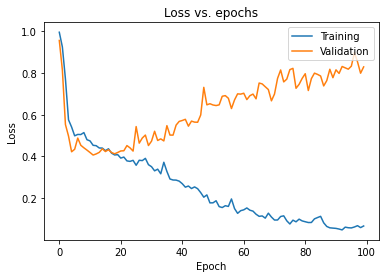

In [15]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [16]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [17]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [18]:
# Re-build the model with weight decay and dropout layers
model = get_regularised_model(1e-5, 0.3)


In [19]:
# Compile the model
model.compile(optimizer='adam', loss= 'mse', metrics=['mae'])


In [20]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=False)


In [21]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)


2/2 - 0s - loss: 0.4210 - mae: 0.5295


[0.4209948182106018, 0.5295166969299316]

#### Plot the learning curves

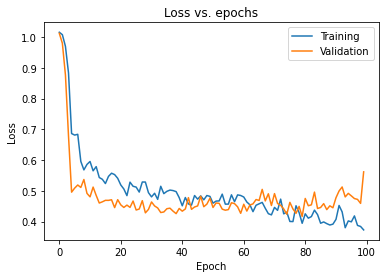

In [22]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [23]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

#Here we have written 3 different callbacks for training, testing and predicting.
#But they could have all been written within the same class, by using the appropriate 
#methods names and signatures that are used below.

#Training callback. Called with model.fit()
class TrainingCallBack(Callback):
  def on_train_begin(self, logs =None):
    print("Starting training....")

  def on_epoch_begin(self, epoch, logs=None):
    print(f"Starting epoch {epoch}")

  def on_train_batch_begin(self, batch, logs=None):
    print(f"Training: Starting batch {batch}")

  def on_train_batch_end(self,batch, logs=None):
    print(f"Training: Finished batch {batch}")

  def on_epoch_end(self, epoch, logs= None):
    print(f"Finished epoch {epoch}")
  
  def on_train_end(self, logs=None):
    print("Finished training!")



#Testing callback: no epochs since we don't train, so no methods related to epoch. Called with model.evaluate
class TestingCallBack(Callback):
  def on_test_begin(self, logs =None):
    print("Starting testing....")

  def on_test_batch_begin(self, batch, logs=None):
    print(f"Testing: Starting batch {batch}")

  def on_test_batch_end(self,batch, logs=None):
    print(f"Testing: Finished batch {batch}")
  
  def on_test_end(self, logs=None):
    print("Finished testing!")



class PredictionCallBack(Callback):
  def on_predict_begin(self, logs =None):
    print("Starting prediction....")

  def on_predict_batch_begin(self, batch, logs=None):
    print(f"Prediction: Starting batch {batch}")

  def on_predict_batch_end(self,batch, logs=None):
    print(f"Prediction: Finished batch {batch}")
  
  def on_predict_end(self, logs=None):
    print("Finished predicting!")



In [24]:
# Re-build the model
model = get_regularised_model(1e-5, 0.3)


In [25]:
# Compile the model
model.compile(optimizer='adam', loss='mse')


#### Train the model with the callback

In [26]:
# Train the model, with some of the data reserved for validation
model.fit(train_data, train_targets, epochs=3, batch_size=128, verbose=False, callbacks=[TrainingCallBack()])


Starting training....
Starting epoch 0
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 0
Starting epoch 1
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 1
Starting epoch 2
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 2
Finished training!


In [27]:
# Evaluate the model
#Need to specify the callback here too
model.evaluate(test_data, test_targets, verbose=False, callbacks=[TestingCallBack()])


Starting testing....
Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
Finished testing!


0.8720472455024719

In [28]:

# Make predictions with the model
model.predict(test_data, verbose=False, callbacks=[PredictionCallBack()])


Starting prediction....
Prediction: Starting batch 0
Prediction: Finished batch 0
Prediction: Starting batch 1
Prediction: Finished batch 1
Finished predicting!


array([[-0.044492  ],
       [ 0.03085102],
       [-0.02742455],
       [ 0.01320352],
       [-0.03288046],
       [ 0.01438151],
       [ 0.02766832],
       [ 0.03302473],
       [-0.01870613],
       [-0.01471552],
       [-0.02083652],
       [-0.04694307],
       [-0.01903175],
       [ 0.01431166],
       [-0.02165322],
       [-0.03741064],
       [-0.01868183],
       [-0.01159115],
       [ 0.00521745],
       [-0.02164792],
       [ 0.00285682],
       [-0.04322109],
       [ 0.00320434],
       [ 0.01028769],
       [-0.03452262],
       [ 0.00189476],
       [-0.00109924],
       [-0.02303732],
       [-0.0258574 ],
       [ 0.00914351],
       [ 0.00805259],
       [ 0.02739977],
       [ 0.00283941],
       [ 0.0347775 ],
       [-0.04706683],
       [-0.01906955],
       [ 0.02432809],
       [ 0.01238816],
       [ 0.00141567],
       [ 0.01903936],
       [-0.01450547],
       [ 0.03353041],
       [ 0.00563151],
       [-0.02420542],
       [-0.03932478]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [47]:
# Re-train the unregularised model
unregularised_model = get_model()
unregularised_model.compile(optimizer='adam', loss='mse')
unreg_history = unregularised_model.fit(train_data,
                                        train_targets,
                                        epochs=100,
                                        validation_split=0.15,
                                        batch_size=64,
                                        verbose=False,
                                        callbacks= [tf.keras.callbacks.EarlyStopping(patience=10)]
                                        )


In [48]:
# Evaluate the model on the test set

unregularised_model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.3524


0.3523821532726288

In [49]:
# Re-train the regularised model

regularised_model = get_regularised_model(1e-8, 0.2)
regularised_model.compile(optimizer='adam', loss='mse')
reg_history = regularised_model.fit(train_data, train_targets,
                                    epochs=100,
                                    validation_split=0.15,
                                    batch_size=64,
                                    verbose=False,
                                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)]
                                    )

In [50]:
# Evaluate the model on the test set

regularised_model.evaluate(test_data,test_targets, verbose=2)

2/2 - 0s - loss: 0.3978


0.3978267312049866

#### Plot the learning curves

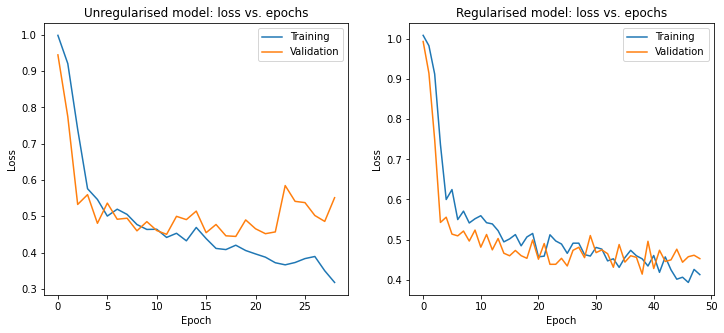

In [51]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()